<a href="https://colab.research.google.com/github/anandra-1/HoodHub/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data from foodhub_order.csv file
df=pd.read_csv("/content/drive/MyDrive/PG_ML_AI/Projects/foodhub_order.csv")

In [ ]:
# get first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# to get the rows and columns
df.shape

(1898, 9)

#### Observations:
* Total no of records is 1898
* Total no of columns is 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Different datatypes are float64,int64 and object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# To identify any missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
* No missing values in the data, so no treatment is required

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statistical Summary of the numerical data and transpose for better format
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
# get min,avg and max food preperation time

min_food_prep_time = df["food_preparation_time"].describe()["min"].round(2)
avg_food_prep_time = df["food_preparation_time"].describe()["mean"].round(2)
max_food_prep_time = df["food_preparation_time"].describe()["max"].round(2)

print(f"Minimum time it takes for food to be prepared once an order is placed : {min_food_prep_time} mins")
print(f"Average time it takes for food to be prepared once an order is placed : {avg_food_prep_time} mins")
print(f"Maximum time it takes for food to be prepared once an order is placed : {max_food_prep_time} mins")

Minimum time it takes for food to be prepared once an order is placed : 20.0 mins
Average time it takes for food to be prepared once an order is placed : 27.37 mins
Maximum time it takes for food to be prepared once an order is placed : 35.0 mins


#### Observations:


*   Minimum time it takes for food to be prepared once an order is placed : 20.0 mins
*   Average time it takes for food to be prepared once an order is placed : 27.37 mins
*   Maximum time it takes for food to be prepared once an order is placed : 35.0 mins



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Orders that are not rated
df.query("rating=='Not given'")['rating'].value_counts().reset_index()


,rating,count
0,Not given,736


#### Observations:
* 736 orders out of 1898 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Customer Counts

In [ ]:
#Total customer count
df.customer_id.nunique()

1200

##### Observations: There are 1200 unique Customer ids

#### Order Counts

In [ ]:
#Total Order Count
df.order_id.nunique()

1898

##### Observations: There are 1898 unique Order ids

#### Restaurent Counts

In [ ]:
#Unique Restaurent Count
df.restaurant_name.nunique()

178

##### Observations:There are 178 resturants

#### Cuisine Types

In [ ]:
#Unique Cuisine Types
df.cuisine_type.nunique()

14

##### Observations: There are 14 different Cuisine types

#### Day of the Week

In [ ]:
#Different Day of the week
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

##### Observations:
Only 2 unique values in day_of_the_week and its Weekend and Weekday.

#### Ratings

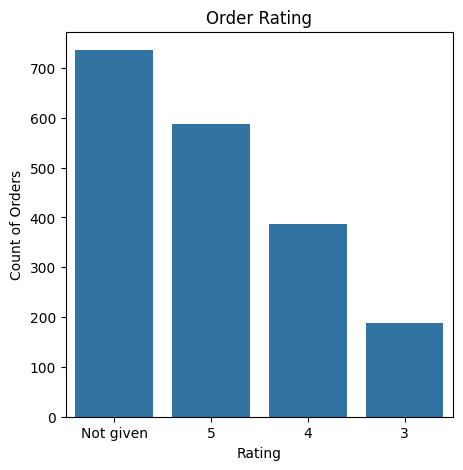

In [ ]:
# Plot on Order Rating
plt.figure(figsize=(5,5))
plt.title("Order Rating")
df_sort_rating=df.sort_values('rating',ascending=False)
sns.countplot(data=df_sort_rating, x='rating')
plt.xlabel("Rating")
plt.ylabel("Count of Orders")
plt.show();

In [ ]:
#getting the count and percentage per rating
pd.DataFrame({
    'Count': df['rating'].value_counts(),
    'Percentage': df['rating'].value_counts(normalize=True) * 100})

,Count,Percentage
rating,,
Not given,736,38.777661
5,588,30.979979
4,386,20.337197
3,188,9.905163


##### Observations:
* 736 orders are not rated i.e 38% of orders rating are not given

#### Repeat order Customers

In [ ]:
#getting the count for each customers
customer_order_count=df.customer_id.value_counts().reset_index(name='order_count')

#Get count and percentage of based on number of orders placed
repeat_cust_count=pd.DataFrame({
    'customer_count': customer_order_count['order_count'].value_counts(),
    'percentage': customer_order_count['order_count'].value_counts(normalize=True) * 100}).reset_index()
repeat_cust_count

,order_count,customer_count,percentage
0,1,784,65.333333
1,2,267,22.250000
2,3,83,6.916667
3,4,33,2.750000
4,5,19,1.583333
5,6,6,0.500000
6,7,4,0.333333
7,9,1,0.083333
8,10,1,0.083333
9,13,1,0.083333


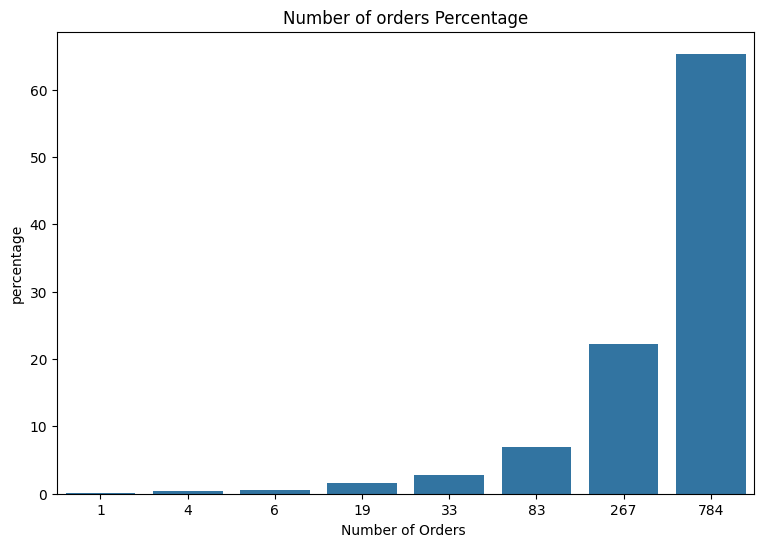

In [ ]:
# Plot on Orders Percentage
plt.figure(figsize=(9,6))
plt.title("Number of orders Percentage")
sns.barplot(data=repeat_cust_count,x='customer_count',y='percentage')
plt.xlabel("Number of Orders ");

##### Observation:
* 784 out of 1898 customers or 65% of customer dont order more than once.

#### Cost Distribution

In [ ]:
# Getting order count between 11 and 16 cost
df[(df.cost_of_the_order>=11) & (df.cost_of_the_order<=16)].shape[0]

705

In [ ]:
# Percentage calculation
(df[(df.cost_of_the_order>=11) & (df.cost_of_the_order<=16)].shape[0]/df.shape[0]) *100

37.14436248682824

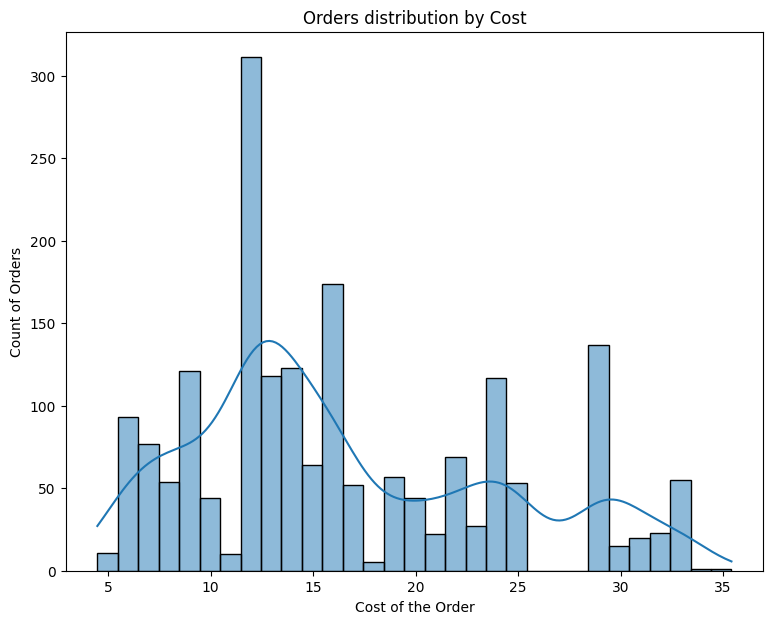

In [ ]:
# Plot on Order distribution by cost
plt.figure(figsize=(9,7))
plt.title("Orders distribution by Cost")
sns.histplot(data=df, x='cost_of_the_order',kde=True,binwidth=1)
plt.xlabel("Cost of the Order")
plt.ylabel("Count of Orders")
plt.show();

##### Observations:
* 705 orders are placed for cost between 11 and 16 which contributes to around 37% of orders placed

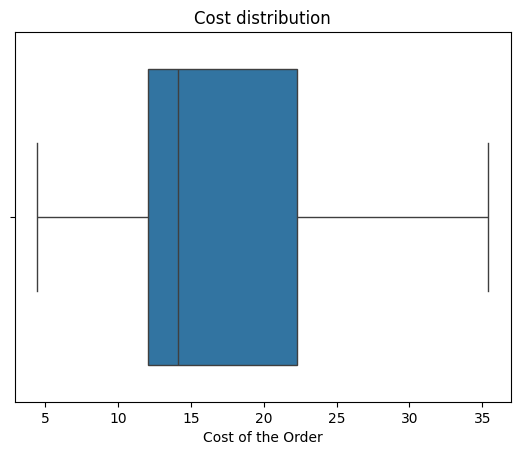

In [ ]:
# Plot on Cost distribution
sns.boxplot(data=df, x='cost_of_the_order')
plt.title("Cost distribution")
plt.xlabel("Cost of the Order")
plt.show();

#### Observations:
* Cost of the food is ranging from minimum of 5 to max of 35 and median is around 14 by observation.

#### Food Perparation time

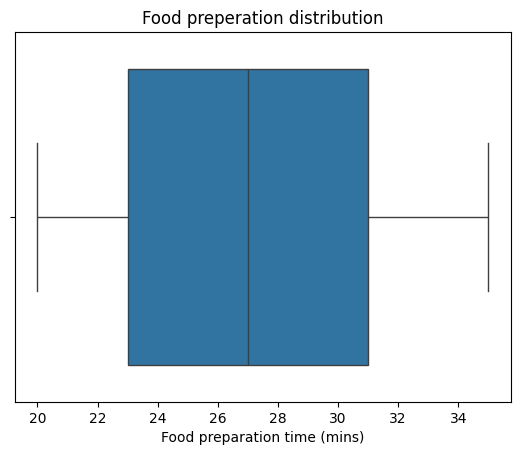

In [ ]:
# Plot on Food perperation distribution
plt.title("Food preperation distribution")
sns.boxplot(data=df, x='food_preparation_time')
plt.xlabel("Food preparation time (mins)")
plt.show();

##### Observation:
* Food preparation time accross most of the cuisines are between 20 and 35 mins.
* Median for food perparation is around 27 mins

#### Orders

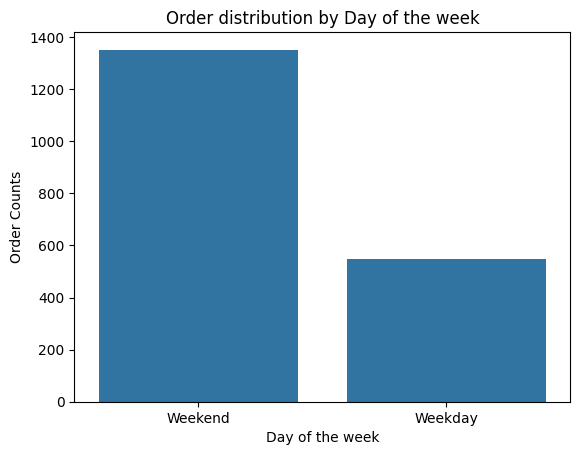

In [ ]:
# Plot on Orders by day of the week
plt.title("Order distribution by Day of the week")
sns.countplot(data=df, x='day_of_the_week')
plt.xlabel("Day of the week")
plt.ylabel("Order Counts")
plt.show();

In [ ]:
# Count of orders by day of the week
df_week_count=df.day_of_the_week.value_counts().reset_index(name='week_count')

#Percentage of order for day of the week
df_week_count['percentage_order']=(df_week_count.week_count/df.shape[0]) *100
df_week_count

,day_of_the_week,week_count,percentage_order
0,Weekend,1351,71.18019
1,Weekday,547,28.81981


##### Obeservations:
* 71% of total orders are placed are over weekend than in weekdays.

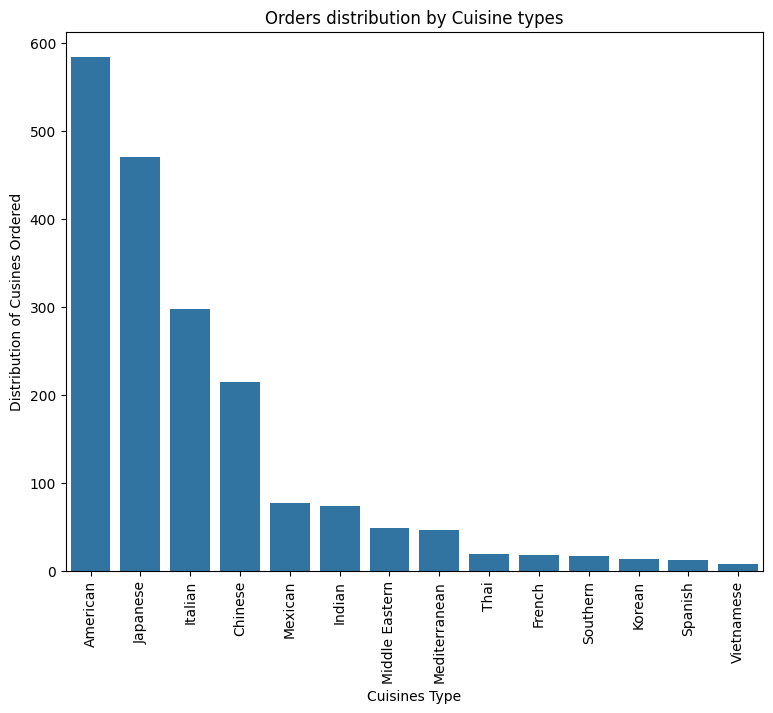

In [ ]:
#sort the data on cuisint type order counts
sorted_df = df['cuisine_type'].value_counts(ascending=False).reset_index()
sorted_df.columns = ['cuisine_type', 'count']

# Plot on Order distribution by cuisine types
plt.figure(figsize=(9,7))
plt.title("Orders distribution by Cuisine types")
sns.barplot(data=sorted_df, x='cuisine_type',y='count')
plt.xlabel("Cuisines Type")
plt.ylabel("Distribution of Cusines Ordered")
plt.xticks(rotation=90);

##### Observations:

Top 5 most ordered Cuisines
* American
* Japanese
* Italian
* Chinese
* Mexican

Least 5 ordered Cuisines
* Vietnamese
* Spanish
* Korean
* Southern
* French


#### Restaurents by Cuisine Types

In [ ]:
# Distinct restaurents for each cuisine type
restaurent_types=df.drop_duplicates(subset=['cuisine_type','restaurant_name'])

#Calculating the Count and percentage of restaurents for each cuisine type
restaurant_cuisine = pd.DataFrame({
    'Cuisine_Type': df['cuisine_type'].value_counts().index,
    'Restaurant_Count': df['cuisine_type'].value_counts().values,
    'Percentage': (df['cuisine_type'].value_counts(normalize=True) * 100).round(2)
}).sort_values('Restaurant_Count', ascending=False).reset_index(drop=True)

restaurant_cuisine

,Cuisine_Type,Restaurant_Count,Percentage
0,American,584,30.77
1,Japanese,470,24.76
2,Italian,298,15.70
3,Chinese,215,11.33
4,Mexican,77,4.06
5,Indian,73,3.85
6,Middle Eastern,49,2.58
7,Mediterranean,46,2.42
8,Thai,19,1.00
9,French,18,0.95


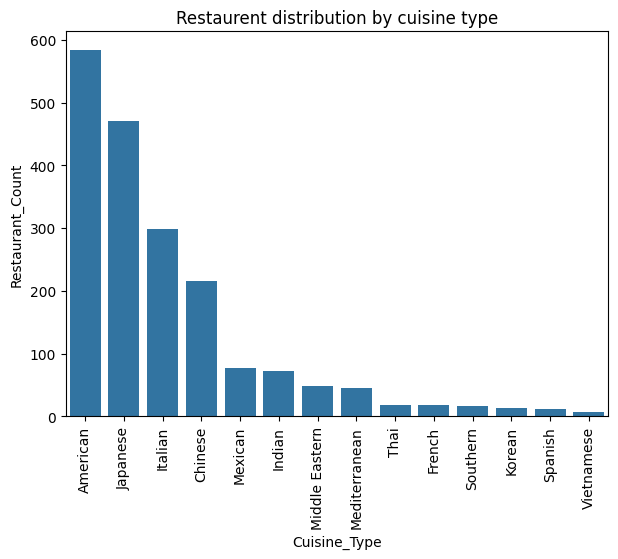

In [ ]:
# Plot on restaurent distribution by cusisine type
plt.figure(figsize=(7,5))
plt.title("Restaurent distribution by cuisine type")
sns.barplot(data=restaurant_cuisine,x="Cuisine_Type",y="Restaurant_Count")
plt.xticks(rotation=90)
plt.show();

##### Obervation:
Below are the Top 5 cuisine type's restaurents counts out of 179 Resturants
* American - 41	(22.91%)
* Italian - 31	(17.32%)%)
* Japanese - 29	(16.20%)%)
* Chinese - 16	(8.94%)
* Indian - 14	(7.82%)

#### Delivery Time

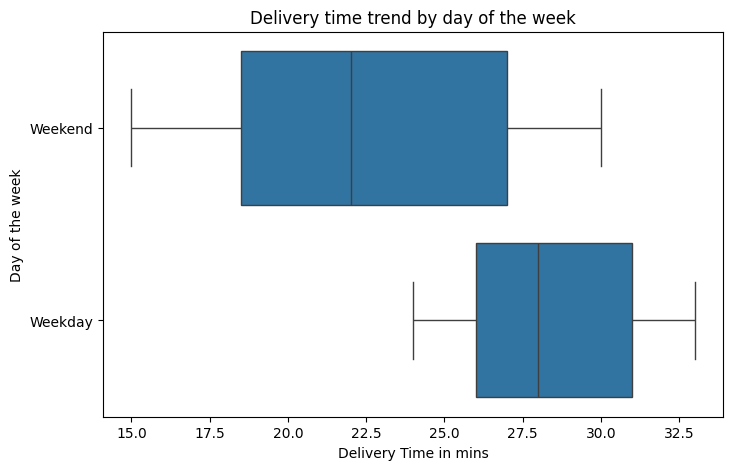

In [ ]:
# BoxPlot on delivery time by day of the week
plt.figure(figsize=(8,5))
plt.title("Delivery time trend by day of the week")
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')
plt.xlabel("Delivery Time in mins")
plt.ylabel('Day of the week');

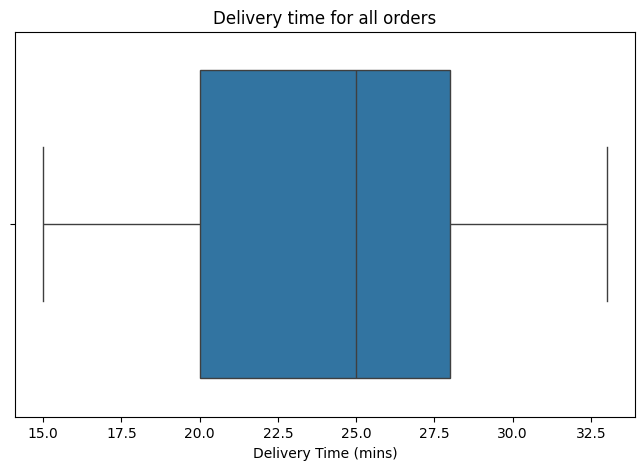

In [ ]:
# Plot on deliver time for over all orders
plt.figure(figsize=(8,5))
plt.title("Delivery time for all orders")
sns.boxplot(data=df, x='delivery_time')
plt.xlabel("Delivery Time (mins)");

##### Observations:
*  Deliver time is ranging betwenn 15 mins to 33 mins where as median delivery time is being 25 mins.
* Relatively Weekend has less delivery time compared to weekdays

#### Total Time

In [ ]:
#calculating Total time
df["total_time"]=df["food_preparation_time"]+df["delivery_time"]
df.total_time.describe().T

,total_time
count,1898.000000
mean,51.533720
std,6.833603
min,35.000000
25%,47.000000
50%,52.000000
75%,56.000000
max,68.000000


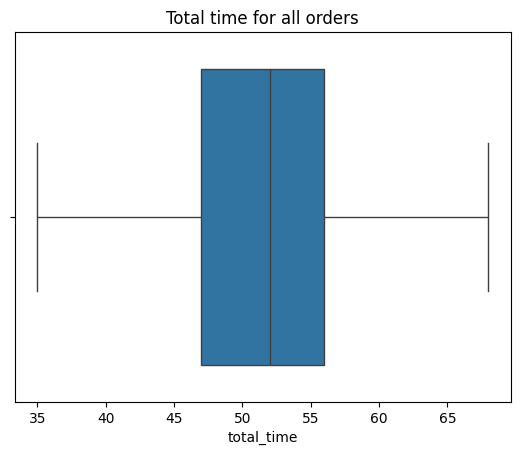

In [ ]:
# Plot on Total time for all Orders
plt.title("Total time for all orders")
sns.boxplot(data=df,x="total_time");

In [ ]:
#Percentage of orders taking more than 1 hour
round((df[df.total_time>60].shape[0]/df.shape[0]) *100)

11

##### Observation:
Below are the total time took for the orders to getr delivered
* Minimum time : 35 mins
* Maximum time : 68 mins
* Average time : 51 mins
* 11% of the orders takes more than 1 hour to reach the customer

#### Cuisine Type vs Cost

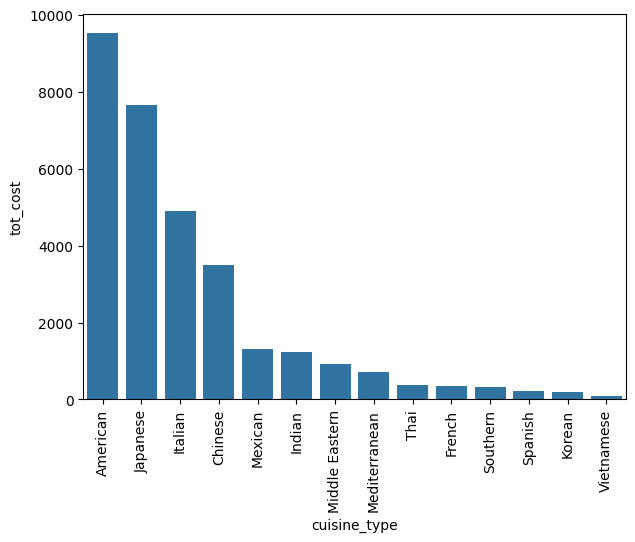

In [ ]:
#Calculating sum of cost of the order for cuisine type
df_tot_cost_cuisine=df.groupby("cuisine_type").agg(tot_cost=("cost_of_the_order","sum")).reset_index().sort_values("tot_cost",ascending=False)

# Plot on Cuisine types with rest to total cost
plt.figure(figsize=(7,5))
sns.barplot(data=df_tot_cost_cuisine,x="cuisine_type",y="tot_cost")
plt.xticks(rotation=90);

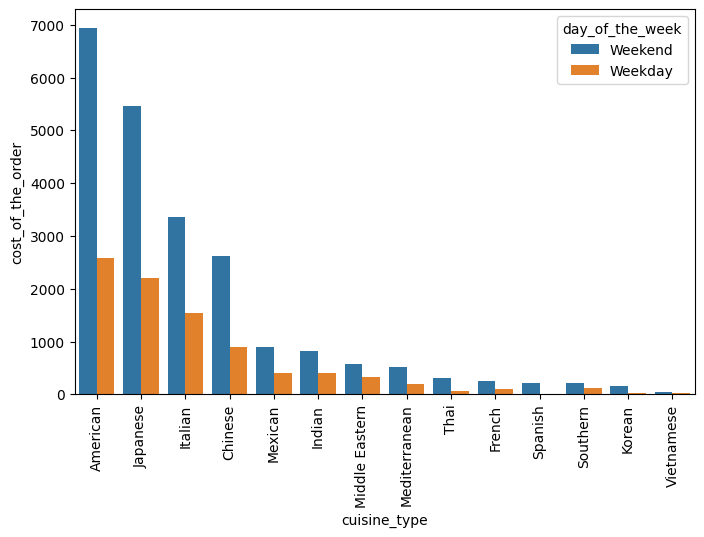

In [ ]:
# Plot on Cuisine types with rest to total cost distribution on day of the week
plt.figure(figsize=(8,5))
df_new=df.groupby(["cuisine_type","day_of_the_week"])["cost_of_the_order"].sum().reset_index()
sns.barplot(data=df_new.sort_values("cost_of_the_order",ascending=False),x='cuisine_type',y='cost_of_the_order',hue='day_of_the_week')
plt.xticks(rotation=90);

##### Observation:
Top 5 revenue generating Cusine Types in both weekdays and weekends
1. American
2. Japanese
3. Italian
4. Chinese
5. Mexican

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Top 5 restaurents with high number of orders
df.restaurant_name.value_counts(ascending=False).reset_index().head()

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
The Top 5 restaurants are

1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#getting most popular cuisine type on weekends
df[df.day_of_the_week=='Weekend'].cuisine_type.value_counts().head(5)

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
American Cusine Type is the most popular on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Filter orders with cost greater than 20
cost_morethan_20=len(df[df.cost_of_the_order>20])

#Calculate Percentage for orders above 20 dollars
Order_percentage = round((cost_morethan_20*100)/ len(df),2)

print(f"Total number of order cost more than 20 dollars : {cost_morethan_20}")
print(f"The percentage of orders cost more than 20 dollars= {Order_percentage}%")

Total number of order cost more than 20 dollars : 555
The percentage of orders cost more than 20 dollars= 29.24%


#### Observations:
* Total number of order cost more than 20 dollars : 555
* Around 30% of the orders cost more than 20 dollars cost

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculating mean of delivery time
round(df["delivery_time"].mean(),2)

np.float64(24.16)

#### Observations:
The mean order delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#Top 3 ordered customers
df.customer_id.value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Top 3 most frequent customers (Customer Ids) and number of orders they placed

* Customer_id: 52832 has placed : 13 orders
* Customer_id: 47440 has placed : 10 orders
* Customer_id: 83287 has placed : 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cost by Cuisine Types


In [ ]:
# Max and Min cost for cuisine types
df.groupby("cuisine_type").agg(max_cost=("cost_of_the_order","max"),
                                                    min_cost=("cost_of_the_order","min")).T

cuisine_type,American,Chinese,French,Indian,Italian,Japanese,Korean,Mediterranean,Mexican,Middle Eastern,Southern,Spanish,Thai,Vietnamese
max_cost,33.18,34.19,29.25,33.03,33.03,33.37,30.75,35.41,33.32,32.93,31.43,29.10,32.93,22.26
min_cost,4.71,4.75,11.98,5.34,5.05,4.47,5.77,5.67,4.85,5.77,7.38,12.13,6.69,6.01


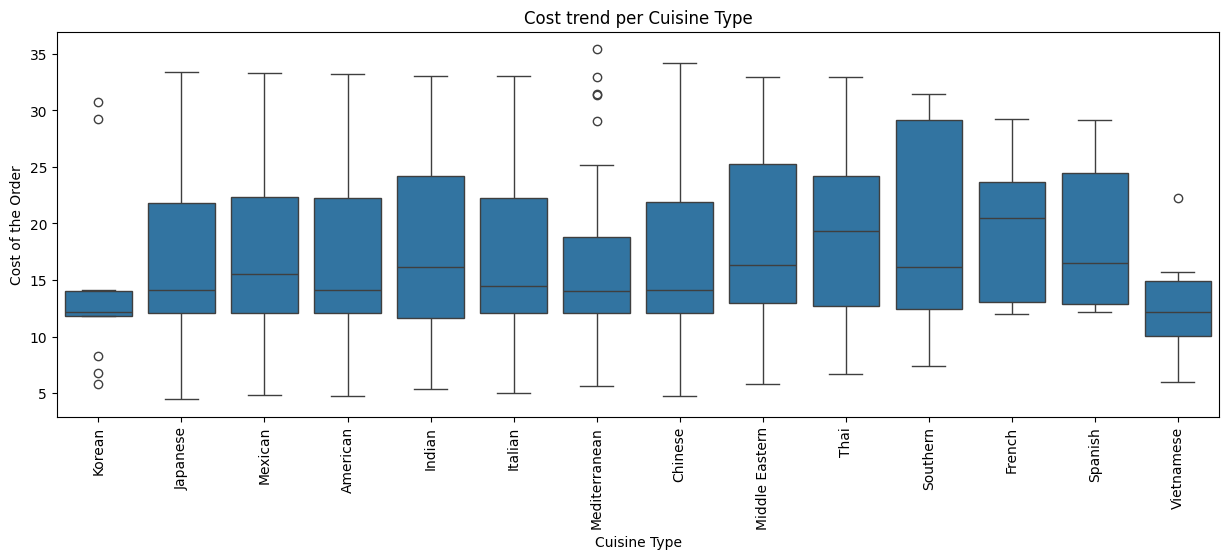

In [ ]:
# Plot on Cuisine types with cost of the order
plt.figure(figsize=(15,5))
plt.title("Cost trend per Cuisine Type")
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.ylabel("Cost of the Order")
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)
plt.show();

##### Observations:
* French and Spanish cuisines minimum cost is above 10.
* Korean and Vietnamese Cuisines is less expensive.
* Koren, Vietnamese and Mediterranean have few outliners which might be due to  special dishes which need more analysis.

#### Feed prepration by Cuisine Type

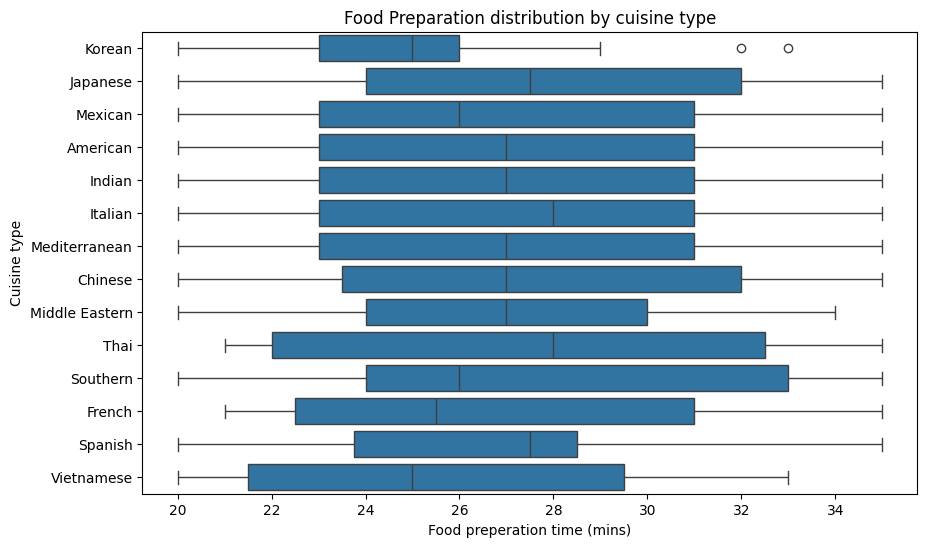

In [ ]:
# Plot on Food perperation time for Cuisine types
plt.figure(figsize=(10,6))
plt.title("Food Preparation distribution by cuisine type")
sns.boxplot(data=df, x='food_preparation_time', y='cuisine_type')
plt.xlabel("Food preperation time (mins)")
plt.ylabel("Cuisine type");

##### Obeservations:
* Korean cuisine's food preparation time are usually takes less time and there are few outlines which are unusually long.

#### Total Time per Cuisine Type

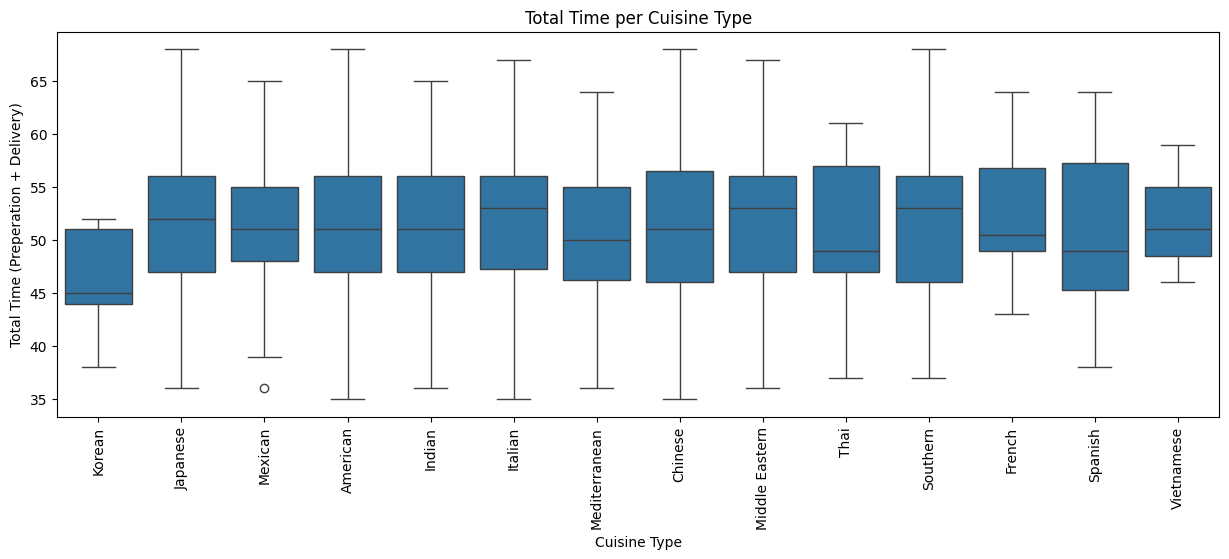

In [ ]:
# Plot on Total time for Cuisine types
plt.figure(figsize=(15,5))
plt.title("Total Time per Cuisine Type")
sns.boxplot(data=df, x='cuisine_type', y='total_time')
plt.ylabel("Total Time (Preperation + Delivery)")
plt.xlabel('Cuisine Type')
plt.xticks(rotation=90)
plt.show();

##### Observation:
* Minimum total time for Vietnamese Cuisine Type is higher compared to others.
* Maximum total time for Korean Cuisine Type is less compared to others
* Average delivery time is 51 min

#### Numeric variable relation

In [ ]:
#definition dataframes for numerical columns
df_num=df[["cost_of_the_order","food_preparation_time","delivery_time","total_time"]]

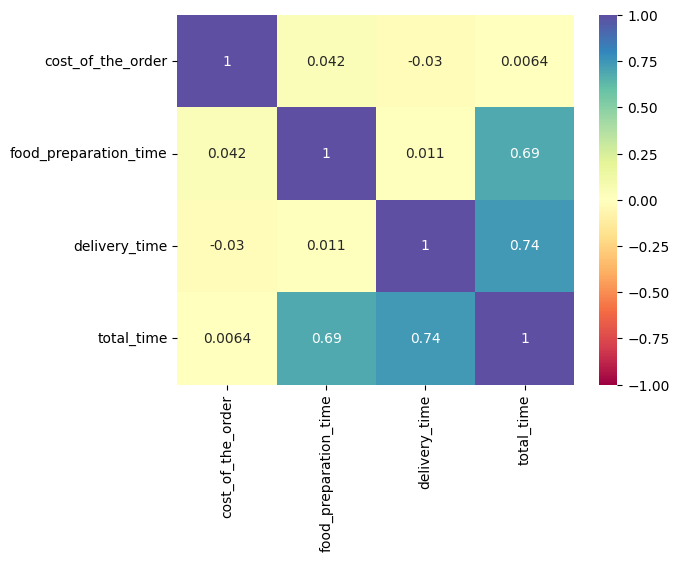

In [ ]:
# HeatMap correlation of data
sns.heatmap(df_num.corr(),cmap='Spectral',vmin=-1,vmax=1,annot=True);

#### Rating based on Total Time for order to get delivered

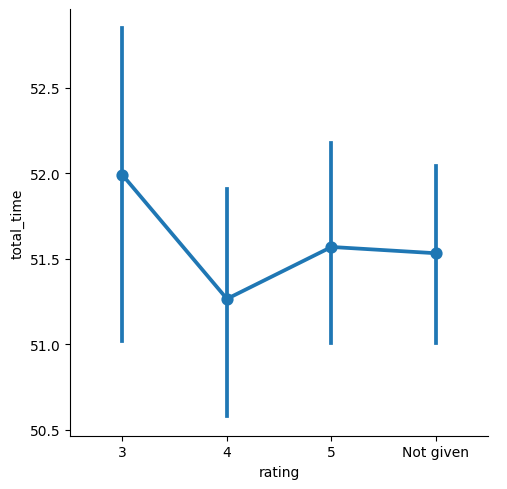

In [ ]:
#Plot for rating against total time
sns.catplot(data=df.sort_values('rating'),x="rating",y="total_time",kind='point');

##### Observation:
the longer total order time got low rating. Even though the orders with 4 ratings are having less total order time which can be due to other criteria. Rating 5 and Not given are having similar total order time.

#### Numerical Variables analysis

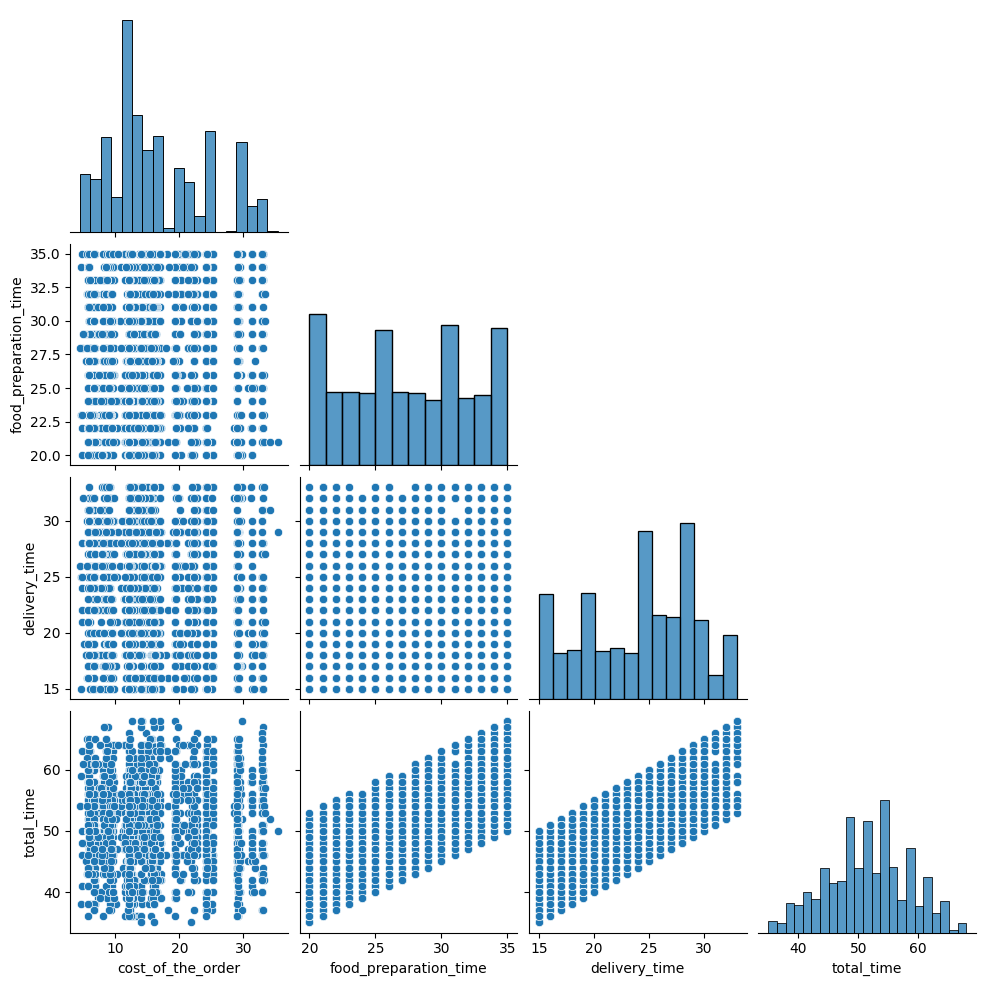

In [ ]:
#PairPlot for numerical varaiables
sns.pairplot(data=df_num,vars=["cost_of_the_order","food_preparation_time","delivery_time","total_time"] ,corner=True);

##### Observation:
There is no clear co-relation between the numeric variable to provide any observation.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter out restaurants with 'Not given' rating
df_with_rating = df[df['rating'] != 'Not given'].copy()  # Use .copy() to avoid the warning

# Convert rating to integer
df_with_rating['rating'] = df_with_rating['rating'].astype(int)

# Get the list of restaurants with rating more than 50 counts
df_rest_rating_cnt = (df_with_rating['restaurant_name'].value_counts().reset_index(name="rating_cnt").query("rating_cnt >= 50").rename(columns={'index': 'restaurant_name'}))

# Get the average rating of each restaurants and filter only those having average rating greater than 4

df_avg_rating=df_with_rating.groupby("restaurant_name")["rating"].mean().reset_index(name="avg_rating")
df_avg_rating_gt_4=df_avg_rating[df_avg_rating.avg_rating>4]

# Combine the datasets to get the restaurants eligible for promotional offer advertisement
promo_eligible_rest=pd.merge(df_rest_rating_cnt,df_avg_rating_gt_4, on="restaurant_name")

promo_eligible_rest

,restaurant_name,rating_cnt,avg_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
The below restaurants met the criteria for having rating counts more than 50 and average rating is more than 4, and are elibigle for promotional offer in advertisement.

* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate the net revenue of the company
df["revenue"]=df["cost_of_the_order"].apply(lambda x: x*0.25 if x > 20 else(x*0.15 if x >5 and x <20 else 0))
net_revenue=df.revenue.sum().round(2)
print(f"Net revenue generated by the company across all orders : {net_revenue}")

Net revenue generated by the company across all orders : 6166.3


In [ ]:
# Calculating revenue percentage
((df.groupby('cuisine_type')["revenue"].sum().round(2)/net_revenue)*100).round(2).reset_index(name="revenue_percentage").sort_values("revenue_percentage", ascending=False)

,cuisine_type,revenue_percentage
0,American,30.46
5,Japanese,23.97
4,Italian,15.68
1,Chinese,11.19
8,Mexican,4.16
3,Indian,4.01
9,Middle Eastern,3.14
7,Mediterranean,2.21
12,Thai,1.27
2,French,1.24


#### Observations:
* Net revenue generated by the company across all orders : 6166.3
* the Top 3 cuisine types American - 30.46%, Japanese - 23.97% and Italian - 15.68% combined contributes to 70% of total revenue generated.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Total time taken for the order
df["total_order_time"]=df.food_preparation_time + df.delivery_time
percentage_above_60=(len(df[df.total_order_time > 60])/ len(df)) * 100
print(f"Percentage of orders taking more than 60 minutes to get delivered :{percentage_above_60:.2f}")

Percentage of orders taking more than 60 minutes to get delivered :10.54


#### Observations:
10.54% of orders took more than 60 minutes to get delivered from the time the order is placed.





### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Average delivery time on weekend and Weekdays

df.groupby("day_of_the_week")["delivery_time"].mean().reset_index(name="avg_delivery_time(mins)").round(2)

,day_of_the_week,avg_delivery_time(mins)
0,Weekday,28.34
1,Weekend,22.47


#### Observations:
The average delivery time of the orders is as below and it shows in the weekend the average delivery time is less compared to that of weekdays.
* Weekday average delivery time : 28.34 mins
* Weekend	average delivery time : 22.47 mins


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* **Customers:** There are 1200 unique Customer using Foodhub app to order food and out of which 65% of them dont order again. This is one of key area for company needs to apply different strategies to retain customers.

* **Restaurents:** Total 178 restaurents are available which provides 14 different cuisine types to the customers.
Top 5 restaurents based on cuisine types are American - 22.91%, Italian - 17.32%, Japanese - 16.20%, Chinese - 8.94%, Indian - 7.82%.
Top 5 popular resturants which gets more number of orders are
    1. Shake Shack
    2. The Meatball Shop
    3. Blue Ribbon Sushi
    4. Blue Ribbon Fried Chicken
    5. Parm

* **Cusine Types:** American, Japanese, Italian, Chinese and Mexican are the top most ordered cuisine types.

* **Price:** 37% orders are placed for price between 11 and 16.

* **Day of the week:** Weekends are busiest which compraises of 71% of total orders compared to weekdays which is around 29%. Which is key focus area the company can improve to increase the orders on weekdays. American Cuisine Type is popular in weekdays and weekends.

* **Rating:** 38% of the orders dont have ratings which is another key focus area for the company to get more customers to Rate. As the rating are crucial for the online business, it helps to understand the customers needs and improve the customer service.

* **Delivery Time:** The average deliver time is around 25 mins and relatively its around 6 mins higher delivery time in weekdays compared to weekends. Longer delivery time the rating gets affected.

* **Total Time:** 51 mins is average total time for the order to reach the customer from the time it was placed. Around 11% of the order take more than 1 hour to get delivered. Indicates some room for improvements. The total time also impacts the rating.

* **Revenue:** Net revenue generated by the company is 6166.3 across all orders. American - 30.46%, Japanese -	23.97% ,Italian -	15.68% cuisine type combined contribute to 70% of total net revenue.


### Recommendations:

* **Expanding by Adding New Restaurants:** Identify other restaurents in the local and reach out to get them added to the app service which will provide more options and increase customer base.

* **Attract new Customers :** By providing discounts on first order to attract new customers and encourage them to try the service. Introducing referral programs to leverage exisiting customers to introduce the app to new customers.

* **Increase Order volume:** Collaborate with restaurants to offer exclusive deals, coupons and time sensitive deals especially on weekdays, which can help increase order volume during slower days.

* **Customer Retention:** Introduce loyalty programs and incentivizing repeat business to increase repeat orders from the customers and boosting customer retention. Emphazize on food quality and provide value for high cost to gain customer trust and confidence.

* **Improve Rating:** Introduce a Point based reward program where customers earn points for orders, ratings/feedback, which will encourage customers to provide ratings/feedback.

* **Promotions and Ads:** Can utlize Social media and online ads to promote the Company visbility and also promote top restaurents, Cuisines, food quality to attract more Customers.

* **Delivery Efficiency:** Need more investigation on why weekdays delivery time is higher compared to weekdays. Work with delivery partners to understand the delivery related issue like staffs availability, routes and provide strategies to improve the delivery efficiency. Can also provide real time order tracking to customers.

* **Customer Engagement:** Add features in the app like trending restaurents, top ordered food/cuisine type, personalized recommendation to increase customer engagement, improve user experience and boosting the reach and sales.

* **Metrics Sharing:** Sharing performance metrics with respective restaurants which will provide actionable insights about their performance, customer rating and areas of improvement.





---